## Предсказание и регрессия

Задача регрессии - предсказание количественного признака

Задача классификации - предсказание качественного, номинального признака

In [1]:
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('students.csv')
df_cut=df[['Growth', 'Shoe size']]
df_cut=df_cut.dropna()

<AxesSubplot:xlabel='Growth', ylabel='Shoe size'>

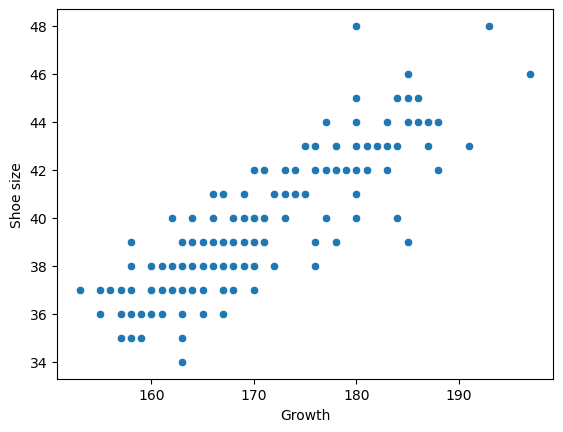

In [2]:
sns.scatterplot(data=df_cut, x='Growth', y='Shoe size')

In [3]:
lr=LinearRegression()
results=lr.fit(df_cut['Shoe size'].values.reshape(-1,1), y=df_cut['Growth'].values)
#                  ['нецелевой признак']                 у=    ['целевой признак']

In [4]:
results.coef_, results.intercept_
# коэффициент, свободный член
# growth = a*ShSize+b
# a=results.coef_, b=results.intercept_

(array([2.77717058]), 60.36581125736731)

In [5]:
df_cut['Growth predict']=results.predict(df_cut['Shoe size'].values.reshape(-1,1))
df_cut.head()

,Growth,Shoe size,Growth predict
0,170,40,171.452635
1,191,43,179.784146
2,172,41,174.229805
3,168,38,165.898293
4,159,36,160.343952


In [6]:
# проверить качество предсказаний

from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_cut['Growth'], df_cut['Growth predict']) #средняя абсолютная ошибка

3.450698681998386

In [7]:
df_cut=df[['MIddle and index finger', 'Middle and ring finger', 'Middle and little finger']]

In [8]:
results=lr.fit(df_cut[['Middle and ring finger', 'Middle and little finger']].values.reshape(-1,2), y=df_cut['MIddle and index finger'].values)
#                            ['2 нецелевых признака']                                               у=    ['целевой признак']

results.coef_, results.intercept_

(array([0.10731496, 0.04389948]), 7.436145518798954)

MIddle and index finger = 0,107 * Middle and ring finger + 0,04 * Middle and little finger + 7,44

In [10]:
df_cut['Predict']=results.predict(df_cut[['Middle and ring finger', 'Middle and little finger']].values.reshape(-1,2))

C:\Users\valer\anaconda3\anac\envs\requirements\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Проверка точности модели на новой выборке

In [11]:
df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['MIddle and index finger', 'Middle and ring finger', 'Middle and little finger']]

In [12]:
df_test_cut['Predict']=results.predict(df_test_cut[['Middle and ring finger', 'Middle and little finger']].values.reshape(-1,2))

C:\Users\valer\anaconda3\anac\envs\requirements\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
mean_absolute_error(df_test_cut['MIddle and index finger'], df_test_cut['Predict'])

4.680118432328658

In [14]:
df_cut=df[['Age', 'Year of birth', 'Month of birthday']]

result=lr.fit(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2), y=df_cut['Age'].values)
df_cut['predict']=result.predict(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2))

C:\Users\valer\anaconda3\anac\envs\requirements\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df_cut.head()

,Age,Year of birth,Month of birthday,predict
0,20,2002,6,20.618535
1,22,2000,4,20.421326
2,21,2000,8,20.821561
3,19,2003,1,20.116787
4,23,1998,12,21.224704


In [16]:
df_test_cut=df_test[['Age', 'Year of birth', 'Month of birthday']]
df_test_cut['predict']=result.predict(df_test_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2))

C:\Users\valer\anaconda3\anac\envs\requirements\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_test_cut.head()

,Age,Year of birth,Month of birthday,predict
0,22,2000,6,20.621444
1,20,2002,3,20.318359
2,21,2001,6,20.619989
3,21,2001,7,20.720048
4,22,2000,5,20.521385


In [18]:
mean_absolute_error(df_test_cut['predict'], df_test_cut['Age'])

1.6054960000660925

## Алгоритмы классификации

kNN - ближайшие соседи

In [19]:
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [20]:
df=pd.read_csv('students.csv')
df_cut=df[['Hair length', 'Shoe size', 'Sex']]
df_cut=df_cut.dropna()

<AxesSubplot:xlabel='Hair length', ylabel='Shoe size'>

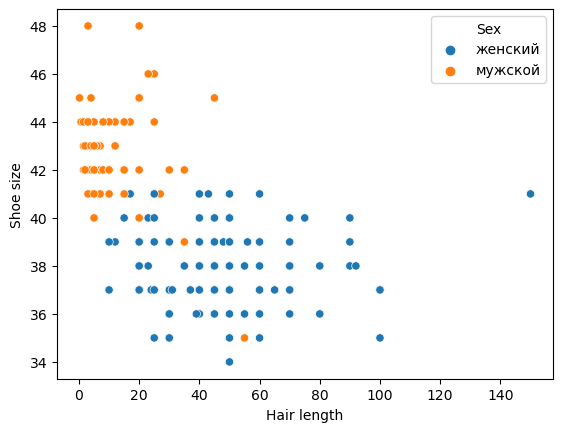

In [21]:
sns.scatterplot(data=df_cut, x='Hair length', y='Shoe size', hue='Sex')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))
arr=scaler.transform(df_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))

#здесь у нас изменяются масштабы, чтобы машина лучше понимала и работала

In [23]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(arr, y=df_cut['Sex'].values)

KNeighborsClassifier(n_neighbors=3)

In [24]:
df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Hair length', 'Shoe size', 'Sex']]
df_test_cut=df_test_cut.dropna()  #лучше без dropna(), лучше подгонять под примерные значения

In [25]:
arr_test=scaler.transform(df_test_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))

In [26]:
df_test_cut['Predict']=model.predict(arr_test)

In [27]:
pd.crosstab(df_test_cut['Predict'], df_test_cut['Sex'])

Sex,женский,мужской
Predict,,
женский,61,1
мужской,1,35


## Линейный классификатор

In [28]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import SGDClassifier

In [29]:
df=pd.read_csv('students.csv')
df_cut=df[['Hair length', 'Shoe size', 'Sex']]
df_cut=df_cut.dropna()

<AxesSubplot:xlabel='Hair length', ylabel='Shoe size'>

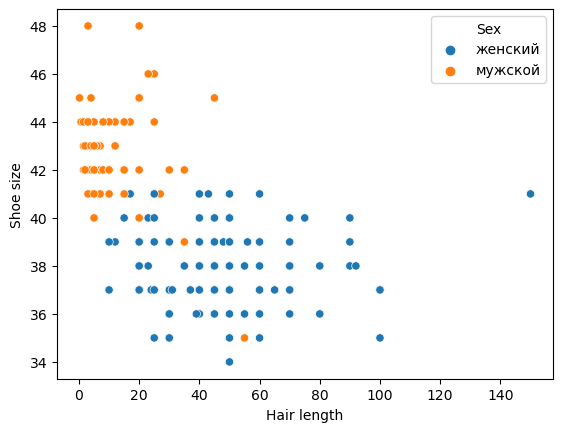

In [30]:
sns.scatterplot(data=df_cut, x='Hair length', y='Shoe size', hue='Sex')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))
arr=scaler.transform(df_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))

In [32]:
model=SGDClassifier(random_state=0)
model.fit(arr, y=df_cut['Sex'].values)

SGDClassifier(random_state=0)

In [33]:
df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Hair length', 'Shoe size', 'Sex']]
df_test_cut=df_test_cut.dropna()

In [34]:
arr_test=scaler.transform(df_test_cut[['Hair length', 'Shoe size']].values.reshape(-1,2))

In [35]:
df_test_cut['Predict']=model.predict(arr_test)

In [36]:
pd.crosstab(df_test_cut['Predict'], df_test_cut['Sex'])

Sex,женский,мужской
Predict,,
женский,61,1
мужской,1,35


## Дерево решений в задачах классификации

In [37]:
import pandas as pd
import seaborn as sns

from sklearn import tree

In [38]:
df=pd.read_csv('students.csv')
df_cut=df[['Hair length', 'Children number', 'Sex', 'Growth', 'Weight']]
df_cut=df_cut.dropna()

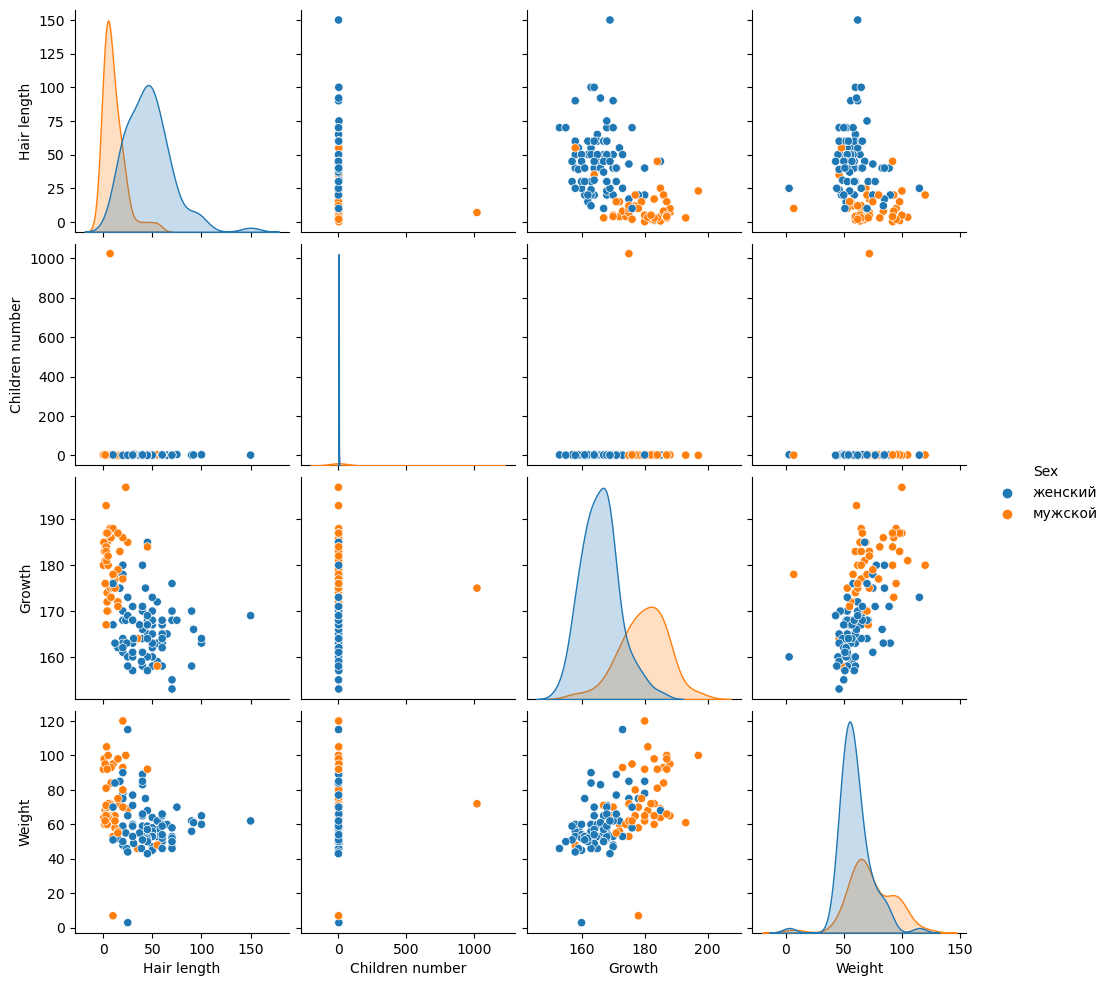

In [39]:
sns.pairplot(df_cut, hue='Sex')

In [40]:
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(df_cut[['Weight', 'Growth', 'Hair length', 'Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=3)

[Text(248.0, 323.4, 'Hair length <= 18.5\ngini = 0.46\nsamples = 131\nvalue = [84, 47]\nclass = женский'),
 Text(124.0, 230.99999999999997, 'Growth <= 168.5\ngini = 0.206\nsamples = 43\nvalue = [5, 38]\nclass = мужской'),
 Text(62.0, 138.6, 'Hair length <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = женский'),
 Text(31.0, 46.19999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = мужской'),
 Text(93.0, 46.19999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = женский'),
 Text(186.0, 138.6, 'Hair length <= 16.0\ngini = 0.097\nsamples = 39\nvalue = [2, 37]\nclass = мужской'),
 Text(155.0, 46.19999999999999, 'gini = 0.053\nsamples = 37\nvalue = [1, 36]\nclass = мужской'),
 Text(217.0, 46.19999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = женский'),
 Text(372.0, 230.99999999999997, 'Growth <= 176.5\ngini = 0.184\nsamples = 88\nvalue = [79, 9]\nclass = женский'),
 Text(310.0, 138.6, 'Weight <= 48.5\ngini = 0.051\nsamples = 77\nvalue = [75, 2]\

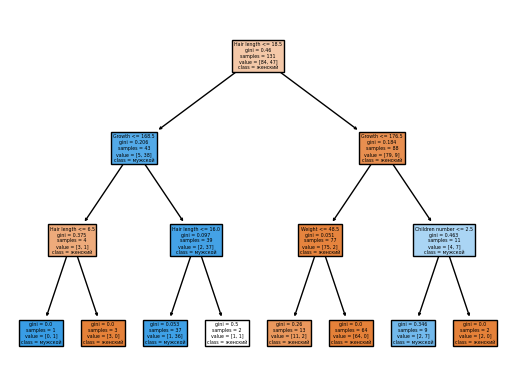

In [41]:
tree.plot_tree(model, feature_names=['Weight', 'Growth', 'Hair length', 'Children number'], class_names=['женский', 'мужской'], filled=True)

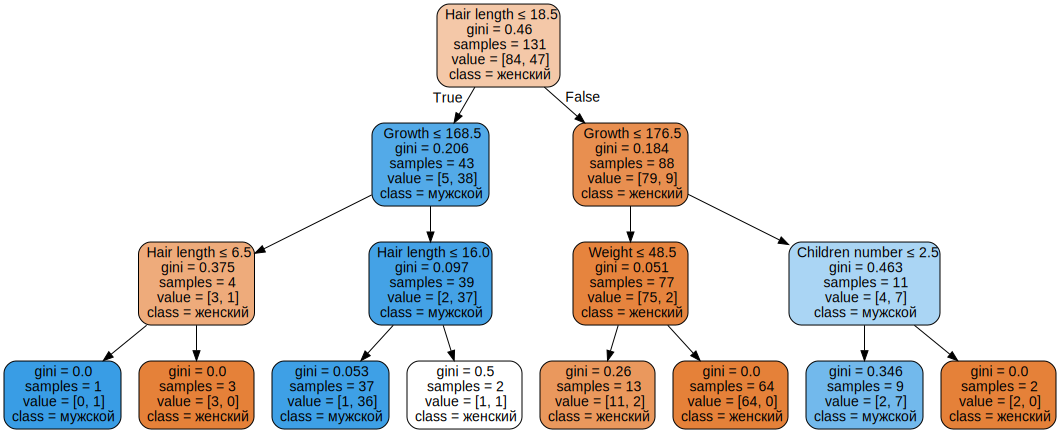

In [44]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=['Weight', 'Growth', 'Hair length', 'Children number'],  class_names=['женский', 'мужской'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [45]:
df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Weight', 'Growth', 'Hair length', 'Children number', 'Sex']]
df_test_cut=df_test_cut.dropna()

In [46]:
# данные не нужно нормировать, поэтому scaler не вызывается
df_test_cut['Predict']=model.predict(df_test_cut[['Weight', 'Growth', 'Hair length', 'Children number']].values.reshape(-1,4))

In [47]:
pd.crosstab(df_test_cut['Predict'], df_test_cut['Sex'])

Sex,женский,мужской
Predict,,
женский,41,1
мужской,1,25


In [ ]:
# для проверки на графике:

df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predict']=='женский'), 'Code'] = '1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predict']=='мужской'), 'Code'] = '2'

sns.scatterplot(df_test_cut, x='Weight', y='Growth', hue='Code')

In [51]:
#метрики качества работы машины

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predict'])

(array([0.97619048, 0.96153846]),
 array([0.97619048, 0.96153846]),
 array([0.97619048, 0.96153846]),
 array([42, 26], dtype=int64))

pressision: доля правильно предсказанных ж/м среди всех ж/м

recall: доля истинных ж/м среди определенных ИИ ж/м

F1 - почитать

количество ж/м

## Дерево решений в задачах регрессии

In [52]:
import pandas as pd
import seaborn as sns
from sklearn import tree

df=pd.read_csv('students.csv', delimiter=',') #можно и без делиметра, но иногда так указывается разделение ячеек
df_cut=df[['Growth', 'Weight', 'Hair length', 'Shoe size']]
df_cut=df_cut.dropna()

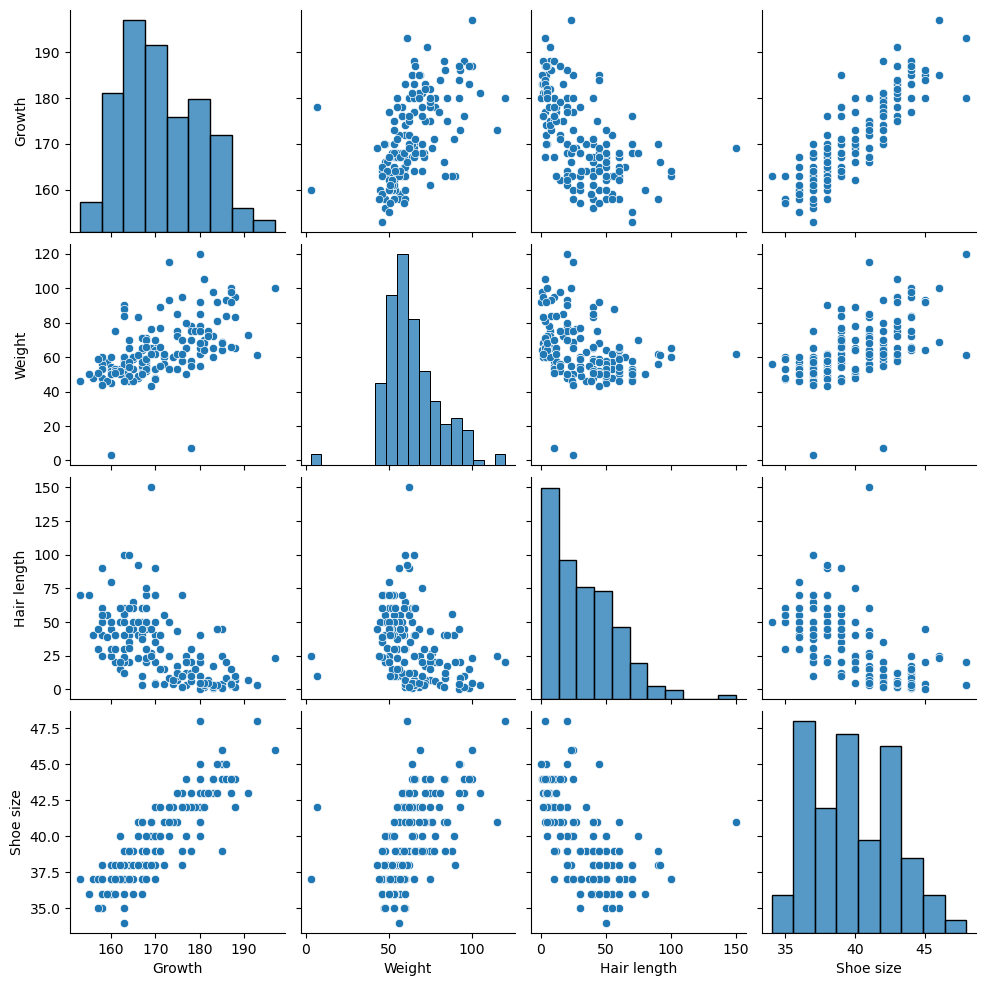

In [53]:
sns.pairplot(data=df_cut)

In [54]:
model=tree.DecisionTreeRegressor(max_depth=2)
model.fit(df_cut[['Weight', 'Hair length', 'Shoe size']].values.reshape(-1,3), y=df_cut['Growth'].values)

DecisionTreeRegressor(max_depth=2)

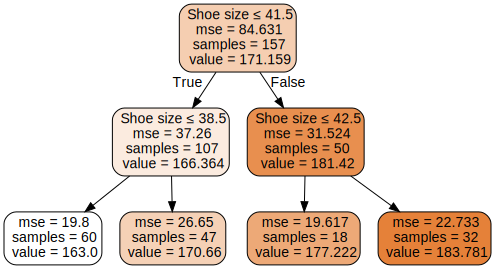

In [55]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=['Weight', 'Hair length', 'Shoe size'],  class_names=['Growth'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [56]:
df_test=pd.read_csv('students.csv')
df_test_cut=df_test[['Growth', 'Weight', 'Hair length', 'Shoe size']]
df_test_cut=df_test_cut.dropna()

df_test_cut['Predict']=model.predict(df_test_cut[['Weight', 'Hair length', 'Shoe size']].values.reshape(-1,3))

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Growth'], df_test_cut['Predict'])

3.7618918552649414